In [46]:
%matplotlib inline

import pandas as pd

import matplotlib.pyplot as plt

import matplotlib as mpl

import numpy as np

plt.style.use('ggplot')

pd.__version__

u'0.17.0'

In [47]:
SSF_subsidies = pd.read_csv("SSF_subsidies.csv")
countries = pd.read_csv("Country_Data.csv")
catch = pd.read_csv("SAU_Catches.csv")
type_EEZ = pd.read_csv("Subtype_Fleet_EEZ.csv")
all_subsidies = pd.read_csv("Subsidies2009.csv")

In [48]:
SSF_subsidies.groupby(['SubType']).sum()

ID  Cnumber  RegionID  total_subsidies  NewData  \
SubType                                                                         
Boat constsruct. & renov.  79159    34169       198   3168111.751967       19   
Fisher assistance          79663    34169       198   1931994.599198       23   
Fisheries dev. projects    79231    34169       198    939904.440623       52   
Fisheries mangt.           78943    34169       198   6930751.048183       22   
Fishery R&D                79015    34169       198   2594717.863325       17   
Fishing access             79519    34169       198    901778.521137       12   
Fishing port develop.      79303    34169       198   3453075.017371        5   
Fuel subsidies             81305    34899       206   7389833.298575       26   
MPAs                       79087    34169       198   1161063.546486        1   
Markt. & storage infrast.  79375    34169       198   2592943.136113       16   
Rural fisher communities   79807    34169       198    147989.768012        2   
Tax exemption              79447    34169       198   1077981.235884        1   
Vessel buyback             79735    34169       198   2071287.313319        4   

                           Developed  HDI_2005  SSFsubsidies_assessed_percent  \
SubType                                                                         
Boat constsruct. & renov.         25    50.789                     776.600000   
Fisher assistance                 25    50.789                     842.720000   
Fisheries dev. projects           25    50.789                    2032.258864   
Fisheries mangt.                  25    50.789                    2063.143562   
Fishery R&D                       25    50.789                    1622.736036   
Fishing access                    25    50.789                       0.000000   
Fishing port develop.             25    50.789                     418.200000   
Fuel subsidies                    26    54.559                     816.900000   
MPAs                              25    50.789                    2066.100000   
Markt. & storage infrast.         25    50.789                    1124.400000   
Rural fisher communities          25    50.789                    2824.900000   
Tax exemption                     25    50.789                     367.900000   
Vessel buyback                    25    50.789                      31.300000   

                           Data_group  SSF_totalCatch_EEZ_percent  \
SubType                                                             
Boat constsruct. & renov.         100                      2432.7   
Fisher assistance                  67                      2432.7   
Fisheries dev. projects           127                      2432.7   
Fisheries mangt.                  180                      2432.7   
Fishery R&D                       151                      2432.7   
Fishing access                     44                      2432.7   
Fishing port develop.              53                      2432.7   
Fuel subsidies                    NaN                      2432.7   
MPAs                              191                      2432.7   
Markt. & storage infrast.         112                      2432.7   
Rural fisher communities           64                      2432.7   
Tax exemption                      54                      2432.7   
Vessel buyback                     47                      2432.7   

                           %SSF_totalCatch_Country    SSF_USD_1000  Ref  
SubType                                                                  
Boat constsruct. & renov.                   2362.2   496065.797143  NaN  
Fisher assistance                           2362.2   476792.297825  NaN  
Fisheries dev. projects                     2362.2   220795.191027  NaN  
Fisheries mangt.                            2362.2  1740794.880568  NaN  
Fishery R&D                                 2362.2   525599.315180  NaN  
Fishing access                              

In [49]:
catch.groupby(['EEZ']).sum()

Recreational  Subsistence  Artisanal  Industrial  total_catch  \
EEZ                                                                    
False         823.0      3620.34   22764.82    82864.25     110072.6   
True          818.5      3609.56   22727.97    79156.04     106312.0   

       SSF_catch  
EEZ               
False    26385.2  
True     26337.5

In [50]:


SSF_subsidies['SSF_subsidies_percent'] = SSF_subsidies['SSF_USD_1000']/SSF_subsidies['total_subsidies']


#  merge original all subsidies data with to align with subsidy 
#  type and whether the EEZ catch data or the FLeet catch data apply, 
#  see type_EEZ data, this is in preparation to later merge with SAU_catch data 

subsidies_type = pd.merge(
    left=all_subsidies,
    right=type_EEZ,
    how='left'
)


#  now this needs to be merged with country data to have coordinates per country
#  and have each country data point assigned to a subregion (thanks to Andres data)

subsidies_type_countries = pd.merge(
    left=subsidies_type,
    right=countries,
    how='left'
)


#  calculate SSF catch percent by dividing SSF catch / total catch

catch['SSF_catch_percent']=catch['SSF_catch']/catch['total_catch']


#  merge with SSF catch from SAU_catch data

subsidies_type_countries_catch = pd.merge(
    left=subsidies_type_countries,
    right=catch, how='left'
)

#  calculating mean SSF catch per subregion, 
#  needed to use to fill gaps for SSF subsidies that have not been assessed

catch_countries = pd.merge(
    left=catch, 
    right=countries, 
    how='left'
)

In [51]:

catch_by_subregion = catch_countries.groupby(['Subregion']).sum()
catch_by_subregion['SSF_subregion_catch'] = (
    catch_by_subregion['SSF_catch']/catch_by_subregion['total_catch']
)

catch_by_subregion = catch_by_subregion.reset_index()

SSF_subregion_catch = catch_by_subregion.loc[:,['Subregion','SSF_subregion_catch']]



#  merging mean catch with all subsidies data
subsidies_type_countries_catch_meancatch = pd.merge(
    left=subsidies_type_countries_catch,right=SSF_subregion_catch, how='left'
) 

#  preparing SSF subsidies by merging with country data
SSF_subsidies_countries = pd.merge(
    left=SSF_subsidies,right=countries, how='left')

#  from SSF subsidies assessed calculate mean per subregion and per type 
#  to fill gaps of countries that have not been assessed
SSF_by_subregion = SSF_subsidies_countries.groupby(
    ['Subregion','Type']).sum(
)


SSF_by_subregion['SSF_subsidies_subregion'] = (
    SSF_by_subregion['SSF_USD_1000']/SSF_by_subregion['total_subsidies']
)
SSF_by_subregion = SSF_by_subregion.reset_index()
SSF_subsidies_subregion = SSF_by_subregion.loc[:,['Subregion','Type','SSF_subsidies_subregion']]


In [52]:

#  as not all subsidies types are covered by countries assessed, 
#  mean values for region are being calculated to replace the empty cells
SSF_by_region = SSF_subsidies_countries.groupby(
    ['RegionName','Type']).sum(
)
SSF_by_region['SSF_subsidies_region'] = (
    SSF_by_region['SSF_USD_1000']/SSF_by_region['total_subsidies']
)
SSF_by_region = SSF_by_region.reset_index()
SSF_subsidies_region = SSF_by_region.loc[
    :,['RegionName','Type','SSF_subsidies_region']
]

#  merge mean subsidies by type and subregion to all subsidies data
catch_subsidies_subregion = pd.merge(
    left=subsidies_type_countries_catch_meancatch,right=SSF_subsidies_subregion, how='left'
)


#  merge mean subsidies by type and region to all subsidies data that now have included total subsidies per subregion
catch_subsidies_subregion_region = pd.merge(
    left=catch_subsidies_subregion,right=SSF_subsidies_region, how='left'
)

#  fill gaps from mean subsidies per subregion with mean subsidies per region and name new column ['subsidies_subregion_all']

#  create new column and name ['SSF_subsidies_true] and state true for all values > 0 

catch_subsidies_subregion_region['total_subsidies_true'] = np.where(
    catch_subsidies_subregion_region['total_subsidies'] > 0, True, False
)
    
def check_data(index=0):
    df = catch_subsidies_subregion_region
    print("ssf all: {}, total: {}".format(df['total_subsidies_true'][index], df['total_subsidies'][index]))
    
check_data(1946)

#  make a new column that states True for NaN in subsidies per subregion and name ['total_subregion_NaN']

catch_subsidies_subregion_region['total_subregion_NaN'] = pd.isnull(catch_subsidies_subregion_region['SSF_subsidies_subregion'])


def check_data(index=0):
    print("ssf all: {}, total: {}".format(catch_subsidies_subregion_region['SSF_subsidies_subregion'][index], catch_subsidies_subregion_region['total_subregion_NaN'][index]))
    
check_data(1946)


ssf all: True, total: 26849.2514743
ssf all: 0.0, total: False


In [53]:
#  create a new column that states True when ['total_subregion_NaN'] is True and ['SSF_subsidies_true] is True
#  name new column ['total_subregion_all']
#  this shows when True that there is a total subsidy for that category but no value from total subregion subsidy data and therefore we will replace with the total region value

catch_subsidies_subregion_region['total_subregion_all'] = np.where((catch_subsidies_subregion_region['total_subsidies_true'] == True) & (catch_subsidies_subregion_region['total_subregion_NaN'] == True), True, False)


def check_data(index=0):
    print("ssf all: {0}, total: {1}, isNaN: {2}".format(catch_subsidies_subregion_region['total_subregion_all'][index],catch_subsidies_subregion_region['total_subsidies_true'][index], catch_subsidies_subregion_region['total_subregion_NaN'][index]))

check_data(1056)

ssf all: False, total: True, isNaN: False


In [54]:
#  create new column and name ['subsidies_subregion_all'] to use value from subregion or from region
#  when ['total_subregion_all'] is true us region data when false use subregion data


#  catch_subsidies_subregion_region['subsidies_subregion_all'] = 
#  np.where(catch_subsidies_subregion_region['total_subregion_all'] == True, 
#  catch_subsidies_subregion_region['SSF_subsidies_region'], 
#  catch_subsidies_subregion_region['SSF_subsidies_subregion'])


catch_subsidies_subregion_region['subsidies_subregion_all'] = np.where(catch_subsidies_subregion_region['total_subregion_all'] == True, catch_subsidies_subregion_region['SSF_subsidies_region'], catch_subsidies_subregion_region['SSF_subsidies_subregion'])

catch_subsidies_subregion_region

def check_data(index=0):
    print("ssf all: {0}, total: {1}, isNaN: {2}".format(catch_subsidies_subregion_region['subsidies_subregion_all'][index],catch_subsidies_subregion_region['total_subregion_all'][index], catch_subsidies_subregion_region['SSF_subsidies_region'][index]))

check_data(1936)

ssf all: 0.156401916407, total: True, isNaN: 0.156401916407


In [55]:
np.sum(catch_subsidies_subregion_region['total_subsidies'])

35371111.003231212

In [56]:
subsidies1 = catch_subsidies_subregion_region.loc[:,['RegionName','Subregion','Countries','CLon', 'CLat','SIDS',
       'TotPop', 'HDI', 'Developed', 'GDP','Category','SubType','Type','EEZ', 'total_subsidies','SSF_catch_percent','SSF_subregion_catch','subsidies_subregion_all']]

#  create a new column 'Factor' and calculate as adjustment value for total subsidies per subregion and total SSF catch per subregion 
#  used to fill gaps for country that have not been assessed, this is done per subsidy subtype also

subsidies1['Factor'] = subsidies1['SSF_catch_percent']/subsidies1['SSF_subregion_catch']

#  multiply the "Factor" value with the mean subsidy value per subregion
#  to estimate the value for SSF subsidies per subsidy type for the countries that have not been assessed
subsidies1['SSF_subsidies_estimates'] = subsidies1['Factor']*subsidies1['subsidies_subregion_all']

subsidies1['SSF_subsidies_estimates_big'] = subsidies1['SSF_subsidies_estimates'] > 1


#  to make sure none of the estimated values exceed 1 (100%) the SSF_subsidies_estimate will be capped at 1

subsidies1['SSF_estimates_corrected'] = np.where(subsidies1['SSF_subsidies_estimates_big'] == True, 1, subsidies1['SSF_subsidies_estimates'])

def check_data(index=0):
    print("ssf_estimates: {0}, ssf_big: {1}, SSF_corrected: {2}".format(subsidies1['SSF_subsidies_estimates'][index],subsidies1['SSF_subsidies_estimates_big'][index], subsidies1['SSF_estimates_corrected'][index]))

check_data(1436)


ssf_estimates: nan, ssf_big: False, SSF_corrected: nan


In [57]:

SSF_subsidies_short = SSF_subsidies_countries.loc[:,['Countries','Type','SSFsubsidies_assessed_percent','weighted_by_sectorsize', 'Data_group','SSF_USD_1000','SSF_subsidies_percent']]


#  merge estimated values for subsidies with SSF assessed subsidies data
SSF_subsidies_estimates_assessed = pd.merge(
    left=subsidies1,right=SSF_subsidies_short,how='left'
)

#  use fillna function to use estimated values for SSF subsidies to fill gaps of countries that have not been assessed
SSF_subsidies_estimates_assessed['SSF_subsidies_percent_all'] = SSF_subsidies_estimates_assessed[
    'SSF_subsidies_percent'].fillna(
    SSF_subsidies_estimates_assessed['SSF_estimates_corrected']
)

#  calculate USD values for all SSF for all subtypes and countries form the estimated and assessed percentages
SSF_subsidies_estimates_assessed['SSF_subsidies_USD'] = (
    SSF_subsidies_estimates_assessed['total_subsidies']
)*SSF_subsidies_estimates_assessed['SSF_subsidies_percent_all']

#  rename column names to make it easy for visualization and graphs and calculate LSF subsidies

SSF_subsidies_estimates_assessed = SSF_subsidies_estimates_assessed.rename(columns={'SSF_subsidies_USD':'SSF subsidies'})

SSF_subsidies_estimates_assessed['LSF subsidies'] = SSF_subsidies_estimates_assessed['total_subsidies'] - SSF_subsidies_estimates_assessed['SSF subsidies']

SSF_subsidies_estimates_assessed.to_csv('SSF_subsidies_all.csv')

np.sum(SSF_subsidies_estimates_assessed['SSF subsidies'])



5105976.141437388

In [58]:

SSFglobalpercent = np.sum(SSF_subsidies_estimates_assessed['SSF subsidies'])/np.sum(catch_subsidies_subregion_region['total_subsidies'])*100

SSFglobalpercent

14.435441795907819

In [59]:

#  prepare for plotting global subsidies per category

Subsidies_per_Category = SSF_subsidies_estimates_assessed.groupby(['Category']).sum()

Subsidies_per_Category['SSF percent'] = Subsidies_per_Category['SSF subsidies']/Subsidies_per_Category['total_subsidies']*100
print Subsidies_per_Category['SSF percent']
Subsidies_per_Category_short = Subsidies_per_Category.loc[:,['LSF subsidies', 'SSF subsidies']]

Subsidies_per_Category_short

Category
Ambiguous             14.427563
Beneficial            22.639321
Capacity-enhancing     9.919247
Name: SSF percent, dtype: float64


LSF subsidies   SSF subsidies
Category                                           
Ambiguous            3547391.831504   603879.848903
Beneficial           8179263.077007  2507269.380980
Capacity-enhancing  13708768.697485  1994826.911555

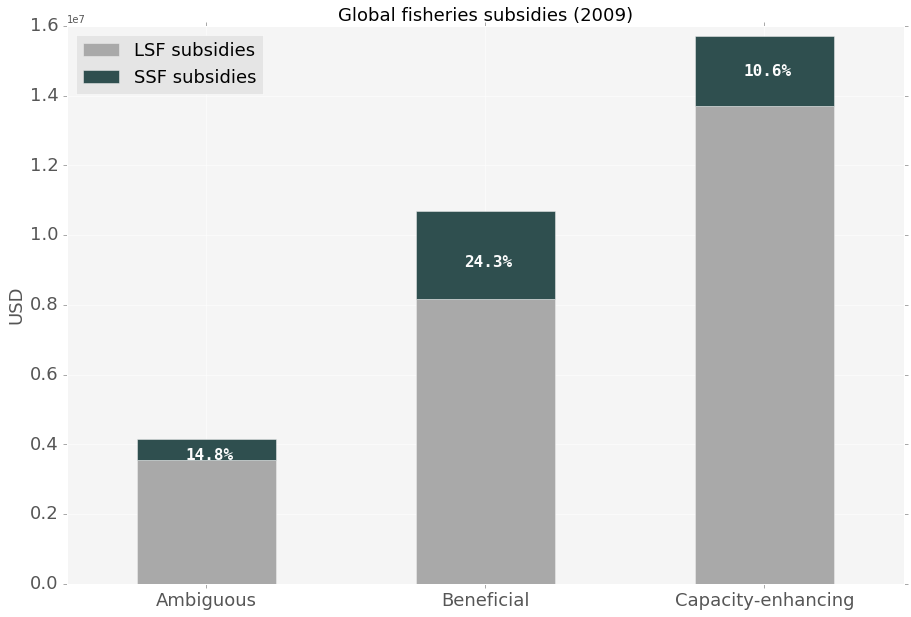

In [60]:

data = Subsidies_per_Category[['LSF subsidies','SSF subsidies']]
data_dict = data.to_dict()


# these percentages are the SSF percent out of the total subsidie calculated in Subsidies_per_Category['SSF percent']
SSFpercent = (
    {'label': 'Ambiguous', 'percentage': 14.8}, 
    {'label': 'Beneficial', 'percentage': 24.3},
    {'label': 'Capacity-enhancing', 'percentage': 10.6}
)

# add totals to SFFpercent
for key, val in data_dict.items():
    for k, v in data_dict[key].items():
        for i in SSFpercent:
            if i['label'] == k:
                if 'total' in i.keys():
                    i['total'] += v
                else:
                    i['total'] = v

# print("data_dict {}".format(data_dict))


# create subplot
ax = data.plot(kind='bar', figsize=(15,10),stacked=True, legend=True, fontsize=18, color=["darkgray","darkslategrey"])
ax.set_title("Global fisheries subsidies (2009)", fontsize=18)
ax.set_ylabel("USD",fontsize=18)
ax.set_xlabel("",fontsize=18)
ax.set_xticklabels(['Ambiguous','Beneficial', 'Capacity-enhancing'],rotation=360, fontsize=18)
ax.set_axis_bgcolor('0.96')


# get an ordered list of percentages
percentages = []
for item in SSFpercent:
    for k, v in item.items():
        if k == 'percentage':
            percentages.append(v)

# prepare rects
N = len(SSFpercent)
indexes = np.arange(N)
width = 0.02
rects = ax.bar(indexes, percentages, width)

# iterate rects and map index with SSF percentage
for index, rect in enumerate(rects):
    SSFpercent[index]['rect_x'] = rect.get_x() 


# now we have a single object holding 
# all the values we need to label the chart 
for bar in SSFpercent:
    #  get percenatage label as a string
    percentage = bar['percentage']
    #  get value of to of bar
    height = bar['total']
    label_position = height - ((height / 100 * percentage) / 2)
    #  position text lables
    ax.text(
        bar['rect_x'] + width/2,
        label_position  - 12.4**5, str(percentage) + '%',
        ha="center",
        family="monospace",
        fontsize=16,
        fontweight="bold",
        color="white"
    )


plt.savefig('Subsidies_Category.svg', dpi=400, bbox_inches='tight')
plt.savefig('Subsidies_Category.pdf', dpi=400, bbox_inches='tight')
plt.legend(loc=2,fontsize=18)
plt.show()

In [61]:
SSF_subsidies_estimates_assessed.columns.values

array(['RegionName', 'Subregion', 'Countries', 'CLon', 'CLat', 'SIDS',
       'TotPop', 'HDI', 'Developed', 'GDP', 'Category', 'SubType', 'Type',
       'EEZ', 'total_subsidies', 'SSF_catch_percent',
       'SSF_subregion_catch', 'subsidies_subregion_all', 'Factor',
       'SSF_subsidies_estimates', 'SSF_subsidies_estimates_big',
       'SSF_estimates_corrected', 'SSFsubsidies_assessed_percent',
       'weighted_by_sectorsize', 'Data_group', 'SSF_USD_1000',
       'SSF_subsidies_percent', 'SSF_subsidies_percent_all',
       'SSF subsidies', 'LSF subsidies'], dtype=object)

In [62]:
SSF_subsidies_estimates_assessed.replace(to_replace='Developed', value=1)
SSF = SSF_subsidies_estimates_assessed.loc[[330],['Developed']]
SSF

Developed
330      True

In [63]:
Subsidies_per_subtype = SSF_subsidies_estimates_assessed.groupby(['SubType']).sum()
Subsidies_per_subtype = Subsidies_per_subtype.sort_values(by=['total_subsidies'],ascending=False)

Subsidies_per_subtype['SSF percent'] = Subsidies_per_subtype['SSF subsidies']/Subsidies_per_subtype['total_subsidies']*100
Subsidies_per_subtype_milions = Subsidies_per_subtype.loc[:,['LSF subsidies','SSF subsidies']]
Subsidies_per_subtype_milions['LSF subsidies'] = Subsidies_per_subtype_milions['LSF subsidies']/1000000
Subsidies_per_subtype_milions['SSF subsidies'] = Subsidies_per_subtype_milions['SSF subsidies']/1000000

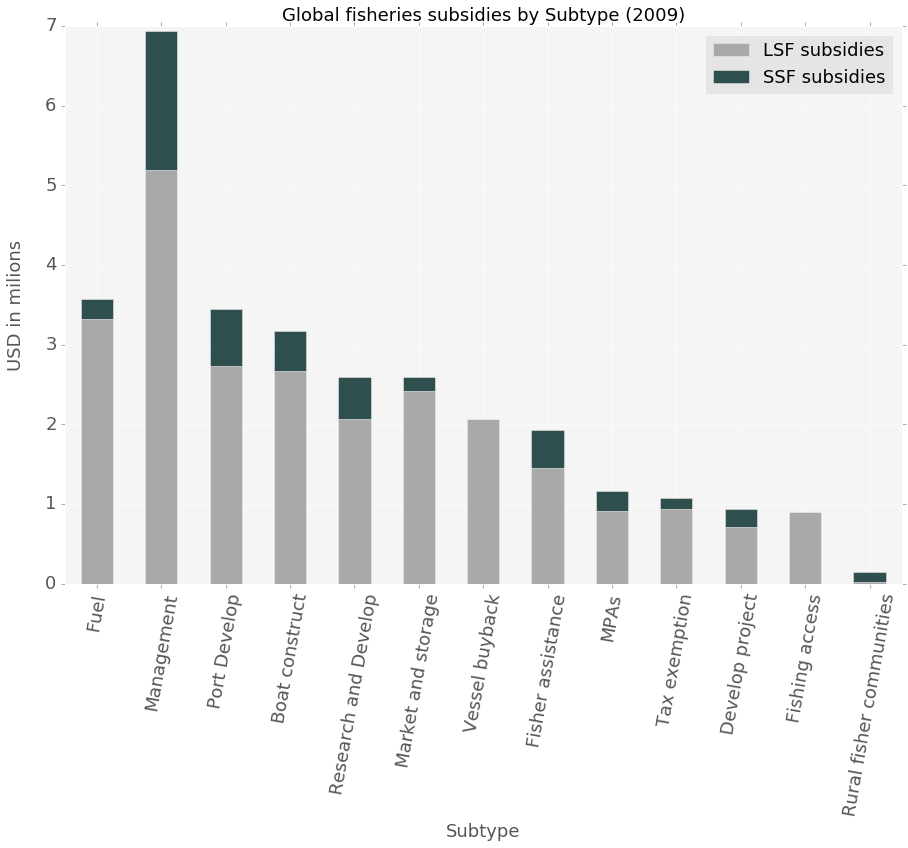

In [64]:
ax = Subsidies_per_subtype_milions[['LSF subsidies','SSF subsidies']].plot(kind='bar', figsize=(15,10),stacked=True, legend=True, fontsize=18, color=["darkgray","darkslategrey"] )
ax.set_title("Global fisheries subsidies by Subtype (2009)", fontsize=18)
ax.set_ylabel("USD in milions",fontsize=18)
ax.yaxis.labelpad = 20
ax.set_xlabel("Subtype",fontsize=18)
ax.set_xticklabels(['Fuel', 'Management','Port Develop','Boat construct','Research and Develop','Market and storage','Vessel buyback','Fisher assistance','MPAs','Tax exemption','Develop project','Fishing access','Rural fisher communities'],rotation=80, fontsize=18)
ax.set_axis_bgcolor('0.96')
plt.legend(loc='best',fontsize=18)
plt.savefig('Subsidies_Subtype.svg', dpi=400, bbox_inches='tight')
plt.savefig('Subsidies_Subtype.pdf', dpi=400, bbox_inches='tight')

plt.show()

In [65]:
Subtypes = Subsidies_per_subtype.loc[:,['SSF percent', 'SSF subsidies','total_subsidies']]
Subtypes.to_csv('subtypes.csv')

In [183]:
Developed_subtype = SSF_subsidies_estimates_assessed.groupby(['SubType','Developed']).sum()

Developed_short = Developed_subtype.loc[:,['SSF subsidies']]
Developed = Developed_short.reset_index()

Developed_pivot = Developed.pivot_table(['SSF subsidies'], index=['SubType'], columns='Developed')

Developed_pivot.to_csv('Developed_pivot.csv')
Developed_sorted = pd.read_csv('Developed_pivot_sorted.csv')
print Developed_sorted['SubType']

0              Fisheries mangt.
1         Fishing port develop.
2                   Fishery R&D
3     Boat constsruct. & renov.
4             Fisher assistance
5                Fuel subsidies
6                          MPAs
7       Fisheries dev. projects
8     Markt. & storage infrast.
9                 Tax exemption
10     Rural fisher communities
11               Fishing access
12               Vessel buyback
Name: SubType, dtype: object


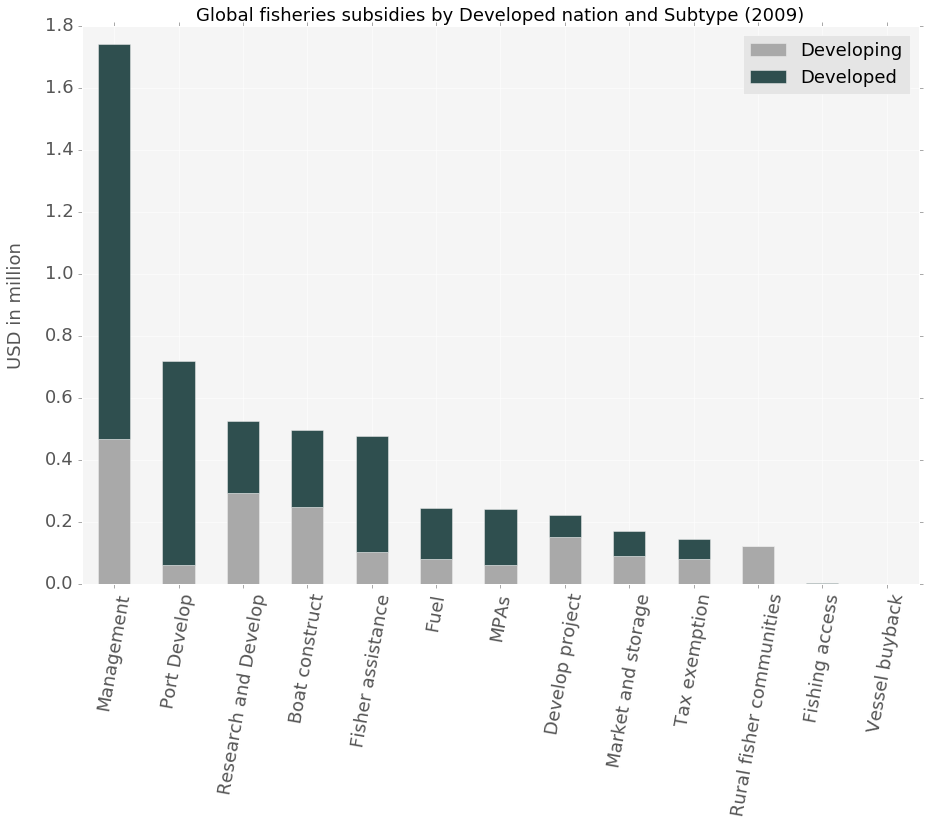

In [185]:
ax = Developed_sorted[['Developing','Developed']].plot(kind='bar', figsize=(15,10),stacked=True, legend=True, fontsize=18, color=["darkgray","darkslategrey"])
            
ax.set_title("Global fisheries subsidies by Developed nation and Subtype (2009)", fontsize=18)
ax.set_ylabel("USD in million",fontsize=18)
ax.yaxis.labelpad = 20
ax.set_xlabel("",fontsize=18)

ax.set_xticklabels(['Management','Port Develop','Research and Develop','Boat construct','Fisher assistance','Fuel','MPAs','Develop project','Market and storage','Tax exemption','Rural fisher communities','Fishing access',
 'Vessel buyback'],rotation=80, fontsize=18)
ax.set_axis_bgcolor('0.96')

ax.set_axis_bgcolor('0.96')
plt.legend(loc='best',fontsize=18)


plt.show()

In [68]:
305.0/138.0

2.210144927536232

In [69]:
SSF_subsidies_estimates_assessed.columns.values

array(['RegionName', 'Subregion', 'Countries', 'CLon', 'CLat', 'SIDS',
       'TotPop', 'HDI', 'Developed', 'GDP', 'Category', 'SubType', 'Type',
       'EEZ', 'total_subsidies', 'SSF_catch_percent',
       'SSF_subregion_catch', 'subsidies_subregion_all', 'Factor',
       'SSF_subsidies_estimates', 'SSF_subsidies_estimates_big',
       'SSF_estimates_corrected', 'SSFsubsidies_assessed_percent',
       'weighted_by_sectorsize', 'Data_group', 'SSF_USD_1000',
       'SSF_subsidies_percent', 'SSF_subsidies_percent_all',
       'SSF subsidies', 'LSF subsidies'], dtype=object)

In [70]:
Subsidies_per_region = SSF_subsidies_estimates_assessed.groupby(['RegionName']).sum()
Subsidies_per_region['LSF subsidies'] = Subsidies_per_region['LSF subsidies']/1000000
Subsidies_per_region['SSF subsidies'] = Subsidies_per_region['SSF subsidies']/1000000
Subsidies_per_region = Subsidies_per_region.sort_values(by=['total_subsidies'],ascending=False)
Subsidies_per_region['SSF percent'] = (Subsidies_per_region['SSF subsidies']/(Subsidies_per_region['total_subsidies']/1000000)) *100
Subsidies_per_region['SSF percent'] 

RegionName
Asia                                     17.474175
Europe                                    6.493796
North America                            18.652064
Oceania                                   4.097518
South, Central America and Carribbean    26.629206
Africa                                   27.807518
Name: SSF percent, dtype: float64

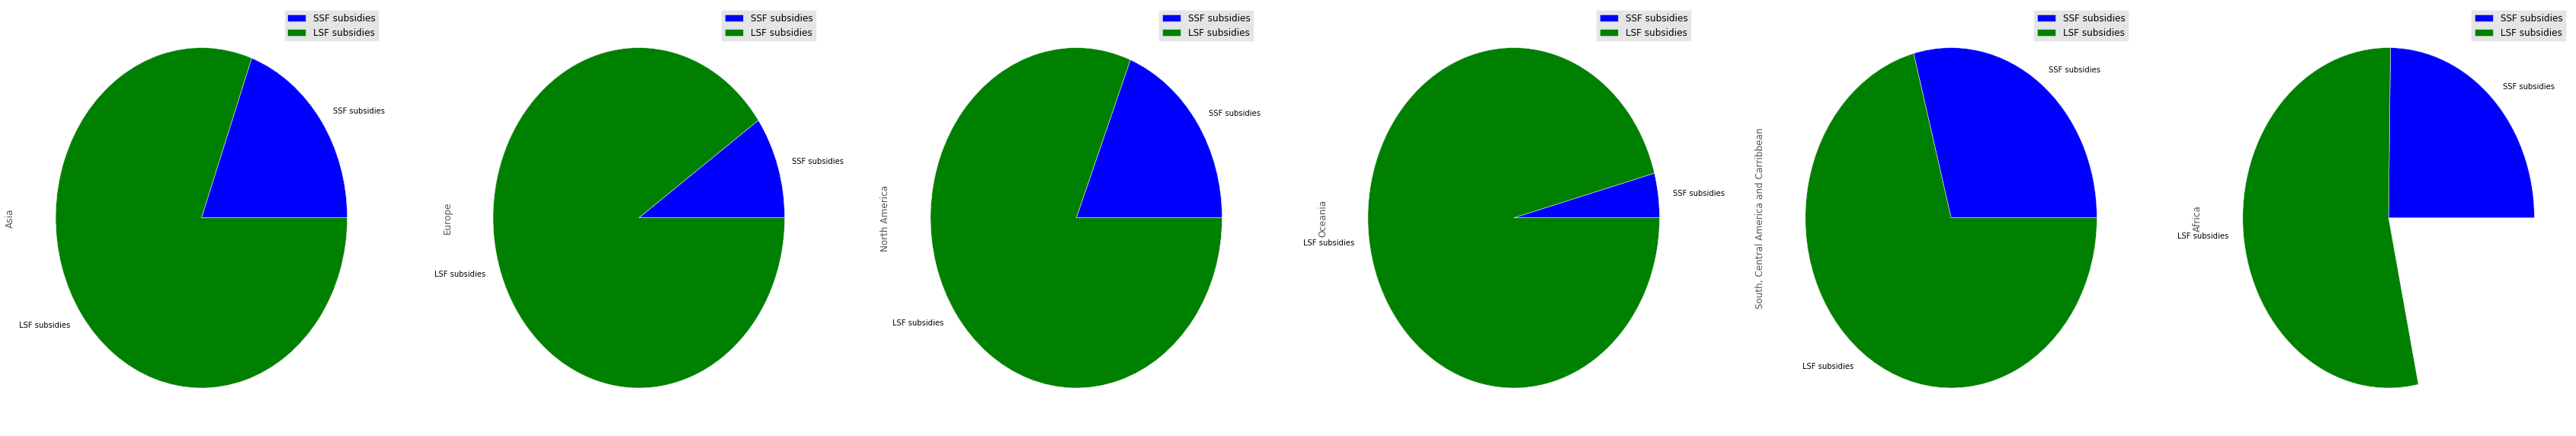

In [71]:
regions_transposed = Subsidies_per_region.loc[:,['SSF subsidies','LSF subsidies']].transpose()
# how to make , color=["darkgray","darkslategrey"]?
ax = regions_transposed.plot(kind='pie', subplots=True, figsize=(60, 10,))

plt.savefig('regions_pie.svg', dpi=400, bbox_inches='tight')
plt.show()

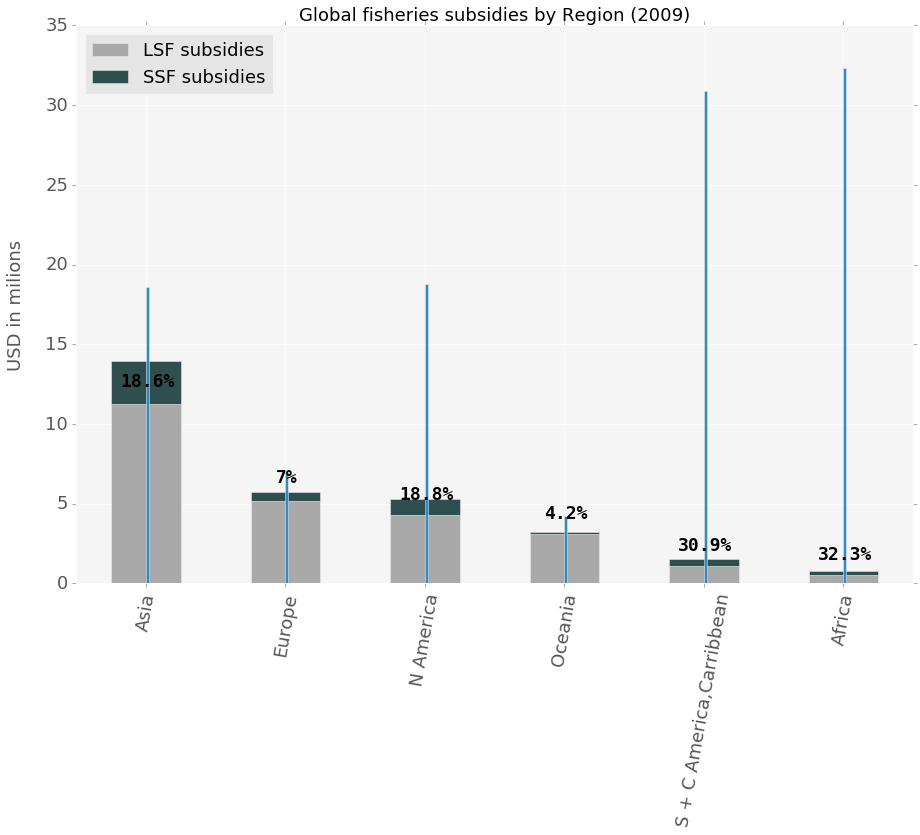

In [72]:

data = Subsidies_per_region[['LSF subsidies','SSF subsidies']]
data_dict = data.to_dict()


# these percentages are the SSF percent out of the total subsidies calculated in Subsidies_per_region['SSF percent']
SSFpercent = (
    {'label': 'Asia', 'percentage': 18.6}, 
    {'label': 'Europe', 'percentage': 7},
    {'label': 'North America', 'percentage': 18.8},
    {'label': 'Oceania', 'percentage': 4.2},
    {'label': 'South, Central America and Carribbean', 'percentage': 30.9},
    {'label': 'Africa', 'percentage': 32.3}
)

# add totals to SFFpercent
for key, val in data_dict.items():
    for k, v in data_dict[key].items():
        for i in SSFpercent:
            #  print("i = {}, k = {}".format(i, k))
            if i['label'] == k:
                if 'total' in i.keys():
                    i['total'] += v
                else:
                    i['total'] = v

# make plot (also called subplot)
ax = data[['LSF subsidies','SSF subsidies']].plot(kind='bar', figsize=(15,10),stacked=True, legend=True, fontsize=18, color=["darkgray","darkslategrey"] )
ax.set_title("Global fisheries subsidies by Region (2009)", fontsize=18)
ax.set_ylabel("USD in milions",fontsize=18)
ax.yaxis.labelpad = 20
ax.set_xlabel("",fontsize=18)
ax.set_xticklabels(['Asia', 'Europe','N America','Oceania','S + C America,Carribbean', 'Africa'],rotation=80, fontsize=18)
ax.set_axis_bgcolor('0.96')
plt.legend(loc='best',fontsize=18)


# get an ordered list of percentages
percentages = []
for item in SSFpercent:
    for k, v in item.items():
        if k == 'percentage':
            percentages.append(v)
            
# prepare rects (rectangles)
N = len(SSFpercent)
indexes = np.arange(N)
width = 0.02
rects = ax.bar(indexes, percentages, width)

# iterate rects and map index with SSF percentage
for index, rect in enumerate(rects):
    SSFpercent[index]['rect_x'] = rect.get_x() 

    # now we have a single object holding 
# all the values we need to label the chart 
for bar in SSFpercent:
    #print bar
    #  get percentage label as a string
    percentage = bar['percentage']
    #  get value of to of bar
    height = bar['total']
    label_position = height - ((height / 100 * percentage))
    #  position text lables
    ax.text(
        bar['rect_x'] + width/2,
        label_position  + 1**5, str(percentage) + '%',
        ha="center",
        family="monospace",
        fontsize=18,
        fontweight="bold",
        color="black"
    )

    


plt.show()

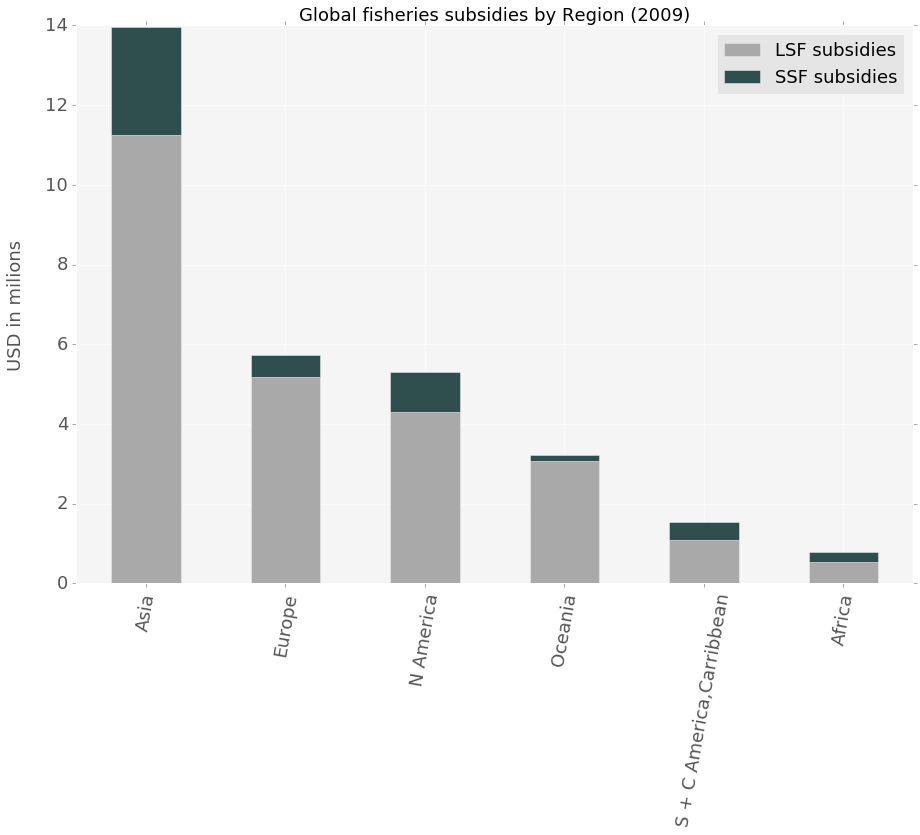

In [73]:
ax = data[['LSF subsidies','SSF subsidies']].plot(kind='bar', figsize=(15,10),stacked=True, legend=True, fontsize=18, color=["darkgray","darkslategrey"] )
ax.set_title("Global fisheries subsidies by Region (2009)", fontsize=18)
ax.set_ylabel("USD in milions",fontsize=18)
ax.yaxis.labelpad = 20
ax.set_xlabel("",fontsize=18)
ax.set_xticklabels(['Asia', 'Europe','N America','Oceania','S + C America,Carribbean', 'Africa'],rotation=80, fontsize=18)
ax.set_axis_bgcolor('0.96')
plt.legend(loc='best',fontsize=18)

plt.savefig('Subsidies_Region.svg', dpi=400, bbox_inches='tight')
plt.savefig('Subsidies_Region.pdf', dpi=400, bbox_inches='tight')
plt.show()

In [74]:
Subsidies_per_developed = SSF_subsidies_estimates_assessed.groupby(['Developed']).sum()
Subsidies_per_developed

CLon          CLat  SIDS       TotPop      HDI  \
Developed                                                           
False      19316.608909  15789.526090   455  52180446890  893.659   
True       16431.901070  18966.247989    26  33573525102  460.395   

                       GDP  EEZ  total_subsidies  SSF_catch_percent  \
Developed                                                             
False      402298501815600  330  12304224.252044                NaN   
True       878717203000000  123  23066886.751188                NaN   

           SSF_subregion_catch       ...         SSF_subsidies_estimates  \
Developed                            ...                                   
False               550.165531       ...                             NaN   
True                109.123008       ...                             NaN   

           SSF_subsidies_estimates_big  SSF_estimates_corrected  \
Developed                                                         
False                                0                      NaN   
True                                 0                      NaN   

           SSFsubsidies_assessed_percent  Data_group    SSF_USD_1000  \
Developed                                                              
False                       11674.626036         661  1752312.730827   
True                         3312.532425         529  3353663.410612   

           SSF_subsidies_percent  SSF_subsidies_percent_all   SSF subsidies  \
Developed                                                                     
False                 116.742111                 116.742111  1752312.730827   
True                   33.129677                  33.129677  3353663.410611   

             LSF subsidies  
Developed                   
False       8078742.519202  
True       17356681.086794  

[2 rows x 22 columns]

In [75]:
Subsidies_per_developed['SSF_percent'] = Subsidies_per_developed['SSF subsidies']/Subsidies_per_developed['total_subsidies']*100
Subsidies_per_developed['SSF_percent']

Developed
False    14.241554
True     14.538865
Name: SSF_percent, dtype: float64

In [76]:
Subsidies_developed_category = SSF_subsidies_estimates_assessed.groupby(['Developed','Category']).sum()
Subsidies_developed_category['SSF_percent'] = Subsidies_developed_category['SSF subsidies']/Subsidies_developed_category['total_subsidies']*100
Subsidies_developed_category['SSF_percent']

Developed  Category          
False      Ambiguous             48.340706
           Beneficial            22.249794
           Capacity-enhancing     8.681764
True       Ambiguous             10.198885
           Beneficial            22.833604
           Capacity-enhancing    10.763277
Name: SSF_percent, dtype: float64

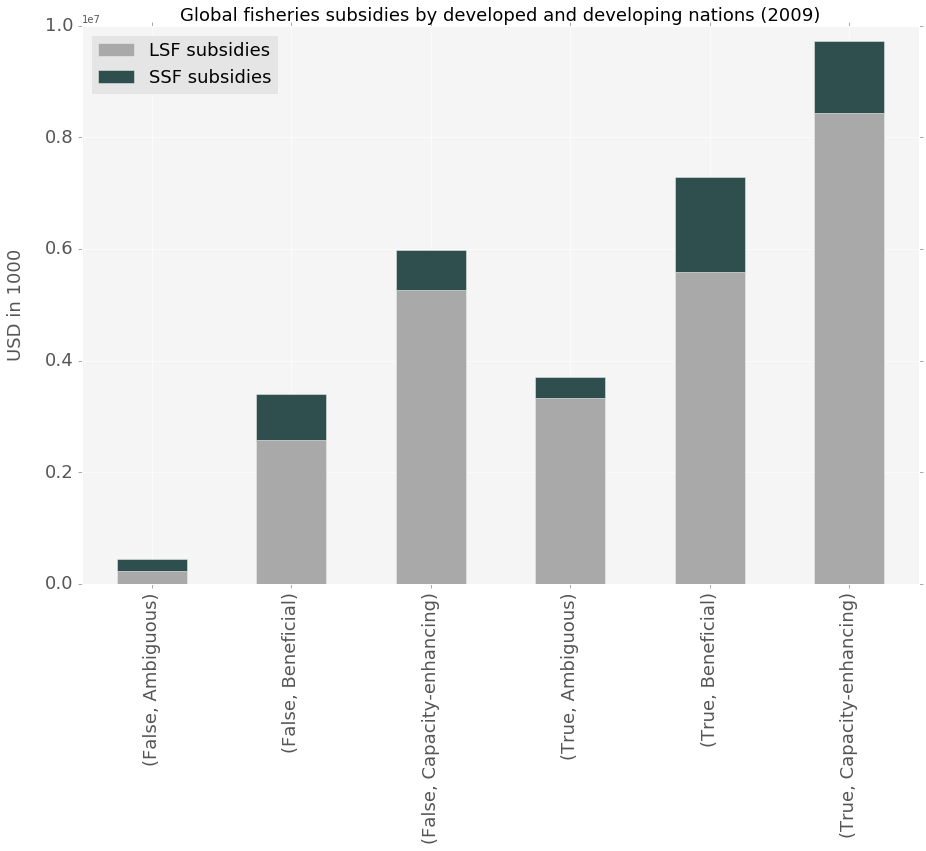

In [77]:
ax = Subsidies_developed_category[['LSF subsidies','SSF subsidies']].plot(kind='bar', figsize=(15,10),stacked=True, legend=True, fontsize=18, color=["darkgray","darkslategrey"] )
ax.set_title("Global fisheries subsidies by developed and developing nations (2009)", fontsize=18)
ax.set_ylabel("USD in 1000",fontsize=18)
ax.yaxis.labelpad = 20
ax.set_xlabel("",fontsize=18)

ax.set_axis_bgcolor('0.96')
plt.legend(loc='best',fontsize=18)
plt.savefig('Subsidies_developed_category.svg', dpi=400, bbox_inches='tight')
plt.savefig('Subsidies_developed_category.pdf', dpi=400, bbox_inches='tight')

plt.show()

In [78]:
Subsidies_developed_category

CLon          CLat  SIDS       TotPop  \
Developed Category                                                            
False     Ambiguous            4457.678979   3643.736790   105  12041641590   
          Beneficial           4457.678979   3643.736790   105  12041641590   
          Capacity-enhancing  10401.250951   8502.052510   245  28097163710   
True      Ambiguous            3791.977170   4376.826459     6   7747736562   
          Beneficial           3791.977170   4376.826459     6   7747736562   
          Capacity-enhancing   8847.946730  10212.595071    14  18078051978   

                                  HDI              GDP  EEZ  total_subsidies  \
Developed Category                                                             
False     Ambiguous           206.229   92838115803600    0    464045.636732   
          Beneficial          206.229   92838115803600  330   3685527.321981   
          Capacity-enhancing  481.201  216622270208400    0   8154651.293331   
True      Ambiguous           106.245  202780893000000    0   3721552.864927   
          Beneficial          106.245  202780893000000  123   7389315.998168   
          Capacity-enhancing  247.905  473155417000000    0  11956017.888092   

                              SSF_catch_percent  SSF_subregion_catch  \
Developed Category                                                     
False     Ambiguous                         NaN           126.961276   
          Beneficial                        NaN           126.961276   
          Capacity-enhancing                NaN           296.242978   
True      Ambiguous                         NaN            25.182233   
          Beneficial                        NaN            25.182233   
          Capacity-enhancing                NaN            58.758543   

                                 ...       SSF_subsidies_estimates_big  \
Developed Category               ...                                     
False     Ambiguous              ...                                 0   
          Beneficial             ...                                 0   
          Capacity-enhancing     ...                                 0   
True      Ambiguous              ...                                 0   
          Beneficial             ...                                 0   
          Capacity-enhancing     ...                                 0   

                              SSF_estimates_corrected  \
Developed Category                                      
False     Ambiguous                               NaN   
          Beneficial                              NaN   
          Capacity-enhancing                      NaN   
True      Ambiguous                               NaN   
          Beneficial                              NaN   
          Capacity-enhancing                      NaN   

                              SSFsubsidies_assessed_percent  Data_group  \
Developed Category                                                        
False     Ambiguous                             3163.800000          80   
          Beneficial                            4289.486036         311   
          Capacity-enhancing                    4221.340000         270   
True      Ambiguous                              535.120000          98   
          Beneficial                            1462.493562         211   
          Capacity-enhancing                    1314.918864         220   

                                SSF_USD_1000  SSF_subsidies_percent  \
Developed Category                                                    
False     Ambiguous            224322.935000              31.638204   
          Beneficial           820022.249587              42.890291   
          Capacity-enhancing   707967.546240              42.213616   
True      Ambiguous            379556.913967               5.352447   
          Beneficial          1687247.131452              14.626688   
          Capacity-enhancing  1286859.3

In [79]:
Subsidies_per_Subregion = SSF_subsidies_estimates_assessed.groupby(['Subregion']).sum()
print Subsidies_per_Subregion.loc[:,['total_subsidies']]

                           total_subsidies
Subregion                                 
Australia and New Zealand    564700.848382
Caribbean                    112550.140879
Central America              325084.588497
Eastern Africa                54079.724644
Eastern Asia               10760535.260700
Eastern Europe              2897532.247149
Melanesia                    731943.389205
Micronesia                  2010780.434165
Middle Africa                180614.682603
Northern Africa              251084.114511
Northern America            5193399.599259
Northern Europe             2432070.155683
Polynesia                     11640.344323
South America               1444396.315945
Southeastern Asia           3231440.391499
Southern Africa              152681.598162
Southern Asia               1051873.886392
Southern Europe             2195230.799891
Western Africa               253191.796131
Western Asia                 474115.606082
Western Europe              1042165.079127


In [80]:
Subregions_all = Subsidies_per_Subregion.loc[:,['total_subsidies', 'SSF subsidies','LSF subsidies']]

Subregions_all_transposed = Subsidies_per_Subregion.loc[:,['SSF subsidies','LSF subsidies']].transpose()
Subregions_all_transposed

Subregion      Australia and New Zealand     Caribbean  Central America  \
SSF subsidies               81707.154000  35156.905000     67817.661000   
LSF subsidies              482738.545144   1688.949917    216241.927953   

Subregion      Eastern Africa    Eastern Asia  Eastern Europe     Melanesia  \
SSF subsidies    16090.739304  1769529.803999    99041.751000   16035.13300   
LSF subsidies    14128.598383  8546850.925856  1658411.073626  660482.03794   

Subregion          Micronesia  Middle Africa  Northern Africa       ...        \
SSF subsidies    38256.995000   78972.529000     35285.974000       ...         
LSF subsidies  1937822.294046   94333.116539    204056.218711       ...         

Subregion      Northern Europe  Polynesia   South America  Southeastern Asia  \
SSF subsidies    100193.193603        NaN   392501.804000      565381.153000   
LSF subsidies   1262823.065322        NaN  1022972.300118     2208949.497024   

Subregion      Southern Africa  Southern Asia  Southern Europe  \
SSF subsidies      2730.181000  263349.626000    163824.977135   
LSF subsidies    120207.064698  318473.971617   1570911.722442   

Subregion      Western Africa   Western Asia  Western Europe  
SSF subsidies   114866.848000  112612.826522   193547.061874  
LSF subsidies   102134.509043  186356.073946   676811.591807  

[2 rows x 21 columns]

Subregion      Australia and New Zealand
SSF subsidies               81707.154000
LSF subsidies              482738.545144


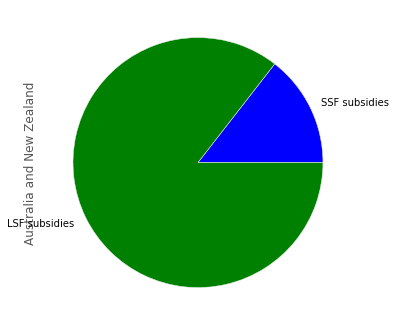

In [81]:
Australia = Subregions_all_transposed.loc[:,['Australia and New Zealand']]
print Australia
ax = Australia.plot(kind='pie', subplots=True, legend=False, figsize=(5.6, 5.6))
plt.savefig('Australia and NewZealand', dpi=400, bbox_inches='tight')

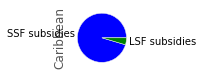

In [82]:
Caribbean = Subregions_all_transposed.loc[:,['Caribbean']]
ax = Caribbean.plot(kind='pie', subplots=True, legend=False, figsize=(1.1, 1.1))
plt.savefig('Caribbean', dpi=400, bbox_inches='tight')

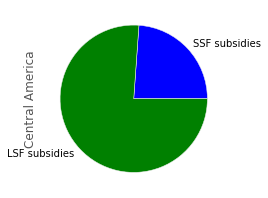

In [83]:
CentralAmerica = Subregions_all_transposed.loc[:,['Central America']]
ax = CentralAmerica.plot(kind='pie', subplots=True, legend=False, label=False, figsize=(3.3, 3.3))
plt.savefig('CentralAmerica', dpi=400, bbox_inches='tight')

/home/anna/.envs/pandas/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


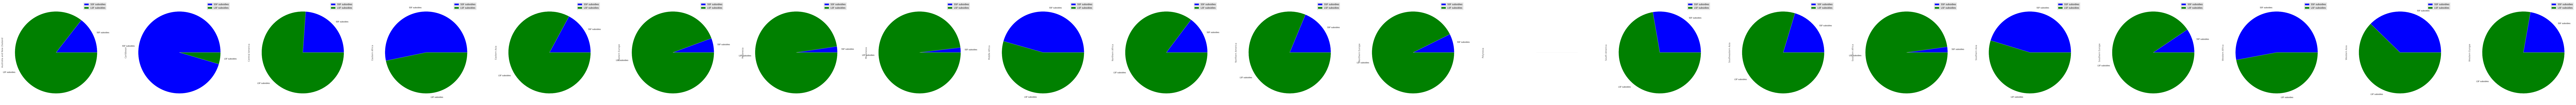

In [84]:
subregions_transposed = Subregions_all.loc[:,['SSF subsidies','LSF subsidies']].transpose()
# how to make , color=["darkgray","darkslategrey"]?
ax = subregions_transposed.plot(kind='pie', subplots=True, figsize=(250, 10,))

plt.savefig('Subsidies_pie.svg', dpi=400, bbox_inches='tight')

In [85]:
#  Subsidies_per_Subregion['total_size'] = Subsidies_per_Subregion['total_subsidies']/100000
#  Subsidies_per_Subregion['total_size'] 
Subregions_all.to_csv('Subsidies_per_Subregion.csv')

In [86]:
SSF_subsidies_estimates_assessed

RegionName        Subregion   Countries        CLon       CLat  SIDS  \
0        Europe  Southern Europe     Albania   20.050049  40.934006     0   
1        Europe  Southern Europe     Albania   20.050049  40.934006     0   
2        Europe  Southern Europe     Albania   20.050049  40.934006     0   
3        Europe  Southern Europe     Albania   20.050049  40.934006     0   
4        Europe  Southern Europe     Albania   20.050049  40.934006     0   
5        Europe  Southern Europe     Albania   20.050049  40.934006     0   
6        Europe  Southern Europe     Albania   20.050049  40.934006     0   
7        Europe  Southern Europe     Albania   20.050049  40.934006     0   
8        Europe  Southern Europe     Albania   20.050049  40.934006     0   
9        Europe  Southern Europe     Albania   20.050049  40.934006     0   
10       Europe  Southern Europe     Albania   20.050049  40.934006     0   
11       Europe  Southern Europe     Albania   20.050049  40.934006     0   
12       Europe  Southern Europe     Albania   20.050049  40.934006     0   
13       Africa  Northern Africa     Algeria    2.296145  27.940730     0   
14       Africa  Northern Africa     Algeria    2.296145  27.940730     0   
15       Africa  Northern Africa     Algeria    2.296145  27.940730     0   
16       Africa  Northern Africa     Algeria    2.296145  27.940730     0   
17       Africa  Northern Africa     Algeria    2.296145  27.940730     0   
18       Africa  Northern Africa     Algeria    2.296145  27.940730     0   
19       Africa  Northern Africa     Algeria    2.296145  27.940730     0   
20       Africa  Northern Africa     Algeria    2.296145  27.940730     0   
21       Africa  Northern Africa     Algeria    2.296145  27.940730     0   
22       Africa  Northern Africa     Algeria    2.296145  27.940730     0   
23       Africa  Northern Africa     Algeria    2.296145  27.940730     0   
24       Africa  Northern Africa     Algeria    2.296145  27.940730     0   
25       Africa  Northern Africa     Algeria    2.296145  27.940730     0   
26       Africa    Middle Africa      Angola   17.237553 -13.299091     0   
27       Africa    Middle Africa      Angola   17.237553 -13.299091     0   
28       Africa    Middle Africa      Angola   17.237553 -13.299091     0   
29       Africa    Middle Africa      Angola   17.237553 -13.299091     0   
...         ...              ...         ...         ...        ...   ...   
1933    Oceania        Polynesia       Samoa -172.333333 -13.583333     1   
1934    Oceania        Polynesia       Samoa -172.333333 -13.583333     1   
1935    Oceania        Polynesia       Samoa -172.333333 -13.583333     1   
1936    Oceania        Polynesia       Samoa -172.333333 -13.583333     1   
1937       Asia     Western Asia       Yemen   47.373059  15.990375     0   
1938       Asia     Western Asia       Yemen   47.373059  15.990375     0   
1939       Asia     Western Asia       Yemen   47.373059  15.990375     0   
1940       Asia     Western Asia       Yemen   47.373059  15.990375     0   
1941       Asia     Western Asia       Yemen   47.373059  15.990375     0   
1942       Asia     Western Asia       Yemen   47.373059  15.990375     0   
1943       Asia     Western Asia       Yemen   47.373059  15.990375     0   
1944       Asia     Western Asia       Yemen   47.373059  15.990375     0   
1945       Asia     Western Asia       Yemen   47.373059  15.990375     0   
1946       Asia     Western Asia       Yemen   47.373059  15.990375     0   
1947       Asia     Western Asia       Yemen   47.373059  15.990375     0   
1948       Asia     Western Asia       Yemen   47.373059  15.990375     0   
1949       Asia     Western Asia       Yemen   47.373059  15.990375     0   
1950     Europe  Southern Europe  Montenegro   19.466667  42.783333   NaN   
1951     Europe  Southern Europe  Montenegro   19.466667  42.783333   NaN   
1952     Europe  Southern Europe  Montenegro   19.466667  42.783333   NaN   
1